<a href="https://colab.research.google.com/github/kocelifk/Prediction-of-students-admission-at-the-university/blob/main/Prediction_of_students_admission_at_the_university.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Prediction of students admission at the university**

**GÖREV 1:** Problemin anlaşılması

Öğrencinin profiline bağlı olarak belirli bir üniversiteye kabul şansını tahmin etmek için regresyon modeli oluşturulması.

***Inputs/Features:***
* GRE Skoru (340 üzerinden)
* TOEFL Skoru (120 üzerinden)
* Üniversite Puanı (5 üzerinden)
* Amaç mektubu (Statement of Purpose - SOP)
* Tavsiye Mektubu (5 üzerinden)
* Lisans not ortalaması (10 üzerinden)
* Araştırma Deneyimi (1 veya 0)

***Outputs:***
Kabul şansı (0 ile 1 arasında)

**GÖREV 2:** Kütüphanelerin ve veri setinin import edilmesi

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#csv dosyasının okutulması
admission_df = pd.read_csv("/content/Admission_Predict.csv")

In [5]:
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
#serial no drop
admission_df.drop('Serial No.', axis=1, inplace = True)
admission_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


**GÖREV 3:** Keşifçi Veri Analizi

In [7]:
#null değerlerin kontrol edilmesi
admission_df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
#dataframe bilgisinin kontrol edilmesi
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [9]:
#dataframe'in istatistiksel özeti
admission_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [10]:
#üniversite sıralamasına göre gruplama
df_university = admission_df.groupby(by = 'University Rating').mean()
df_university

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


**GÖREV 4:** Veri Görselleştirme

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f282b5dcd50>,
      dtype=object)

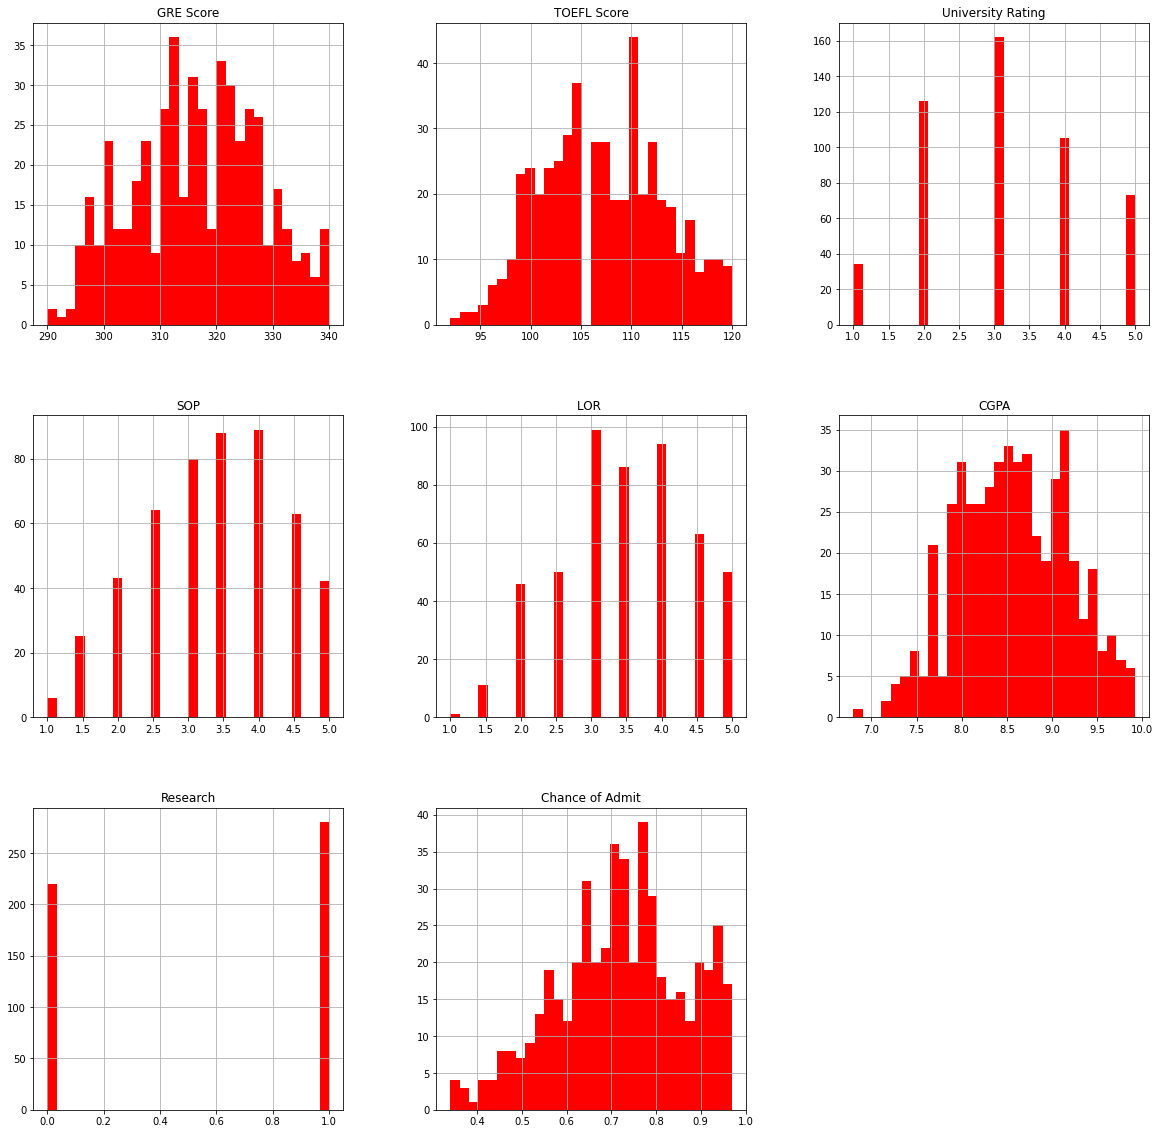

In [11]:
admission_df.hist(bins=30, figsize = (20,20), color = "r")

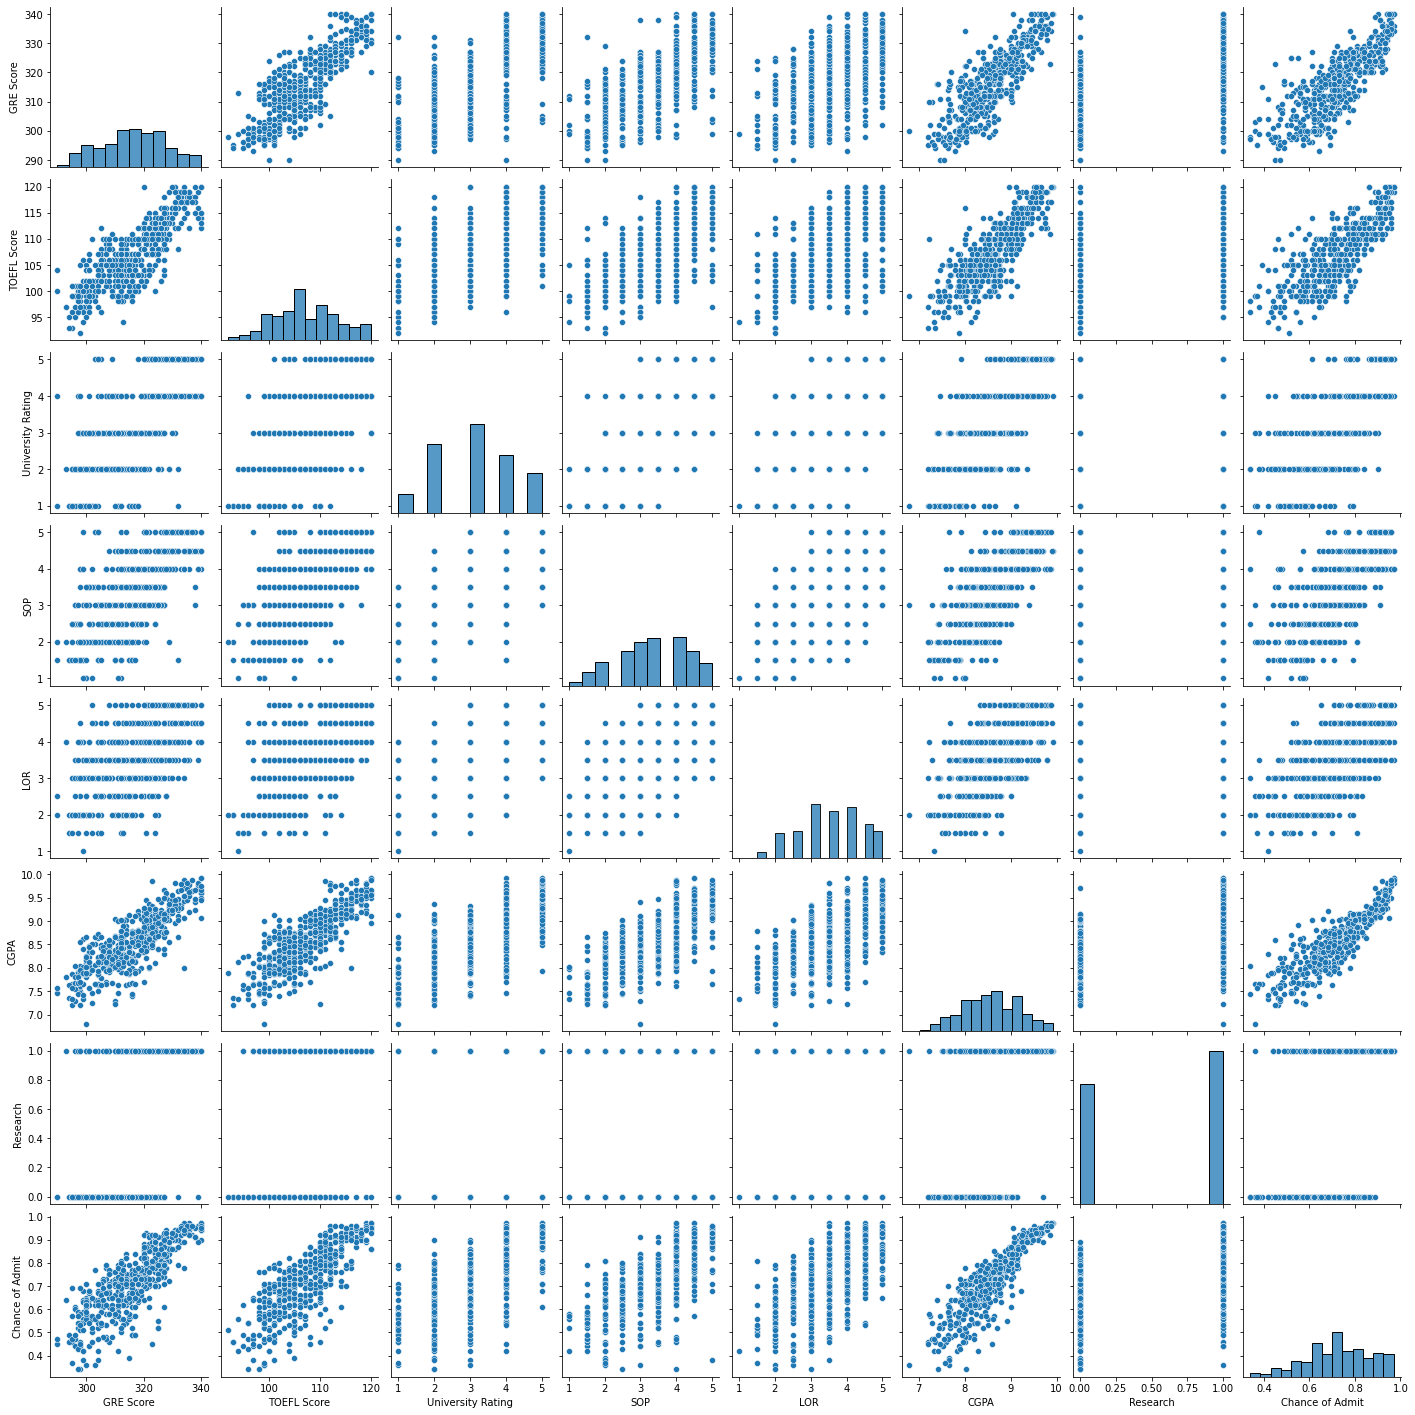

In [12]:
sns.pairplot(admission_df)

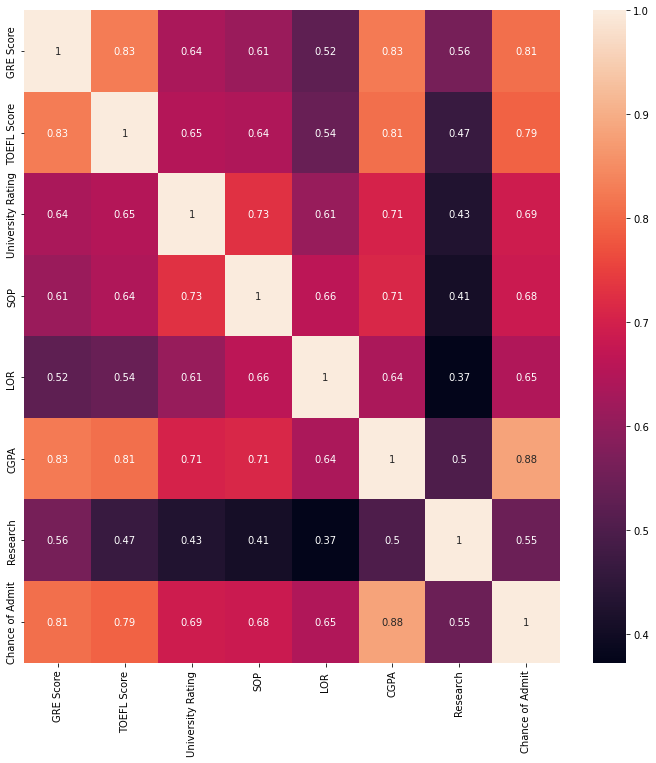

In [13]:
corr_matrix = admission_df.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr_matrix, annot = True)
plt.show()
#Bütün parametreler pozitif korelasyona sahip

**GÖREV 5:** Training ve Testing veri setinin oluşturulması

In [14]:
admission_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [15]:
X = admission_df.drop(columns=['Chance of Admit'])

In [16]:
y = admission_df['Chance of Admit']

In [17]:
X.shape

(500, 7)

In [18]:
y.shape

(500,)

In [19]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [20]:
X = np.array(X)
y= np.array(y)

In [21]:
y = y.reshape(-1,1)
y.shape

(500, 1)

In [22]:
#model train edilmeden önce verinin scale edilmesi
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

In [23]:
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [24]:
#verinin train ve test seti olarak ayrılması

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

**GÖREV 6:** Lineer regresyon modelinin train edilmesi ve değerlendirilmesi

*Simple Lineer Regresyon*
* Amaç; x ve y arasında bir ilişki (model) elde etmektir. 
*Y değişkeninin değerini X değişkenine dayanarak tahmin ederiz.
* X bağımsız değişken, Y bağımlı değişken olarak bilinir.
* Neden simple olarak adlandırılır? Çünkü sadece 2 değişken arasındaki ilişkiyi inceler.
*Neden lineer olarak adlandırılır? Bağımsız değişken arttığında (veya azaldığında) bağımlı değişken doğrusal bir şekilde artar (veya azalır).

*Multiple Lineer Regression*
* Çoklu lineer regresyon **ikiden fazla** değişken arasındaki ilişkiyi inceler. 
* Her bağımsız değişkenin(x) kendisiyle ilişkili katsayı değeri(b1,b2..) vardır.

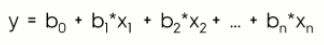

*Model parametreleri nasıl elde edilecek? En Küçük Kareler Toplamı / Least Sum of Squares*

* En küçük karelerin fit edilmesi; noktalar kümesi için en uygun eğriyi veya doğruyu bulmanın bir yoludur.
* Residual'ların karelerinin toplamı en uygun eğri veya doğruyu tahmin etmek için kullanılır.
* Katsayılar en küçük kareler yöntemi kullanılarak bulunur.

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [26]:
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(X_train, y_train)

LinearRegression()

In [27]:
accuracy_LinearRegression = LinearRegression_model.score(X_test, y_test)
accuracy_LinearRegression

0.8282105491273553

**GÖREV 7:** Yapay sinir ağının train edilmesi ve değerlendirilmesi

* Çok katmanlı perceptron(algılayıcı) yapay sinir ağlarının bir sınıfıdır.
* Genellikle girdi(input) katmanı, gizli(hidden) katmanlar ve çıktı(output) katmanından oluşur.
* Training için supervised tekniği olan back-propagation kullanılır.

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [29]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 7))
ANN_model.add(Activation('relu'))

ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))

ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                400       
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 150)               7650      
                                                                 
 activation_1 (Activation)   (None, 150)               0         
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 activation_2 (Activation)   (None, 150)               0

In [30]:
ANN_model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [31]:
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size = 20)

Epoch 1/100
22/22 [==============================] - 1s 2ms/step - loss: 0.5833
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3551
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2965
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2870
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2889
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2655
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2563
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2559
Epoch 9/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2410
Epoch 10/100
22/22 [==============================] - 0s 3ms/step - loss: 0.2405
Epoch 11/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2371
Epoch 12/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2373
Epoch 13/100
22/22 [=================

In [32]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy: {}".format(accuracy_ANN))

3/3 [==============================] - 0s 3ms/step - loss: 0.1855
Accuracy: 0.8144719004631042


In [33]:
epochs_hist.history.keys()

dict_keys(['loss'])

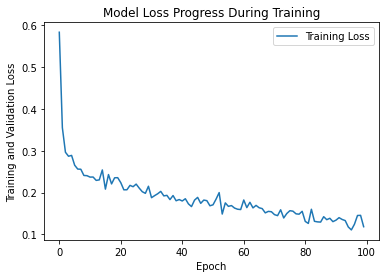

In [34]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

**GÖREV 8:** Decision Tree ve Random Forest modellerinin train edilmesi ve değerlendirilmesi

* Karar ağacı, ağaç yapısı şeklinde regresyon ve sınıflandırma modelleri oluşturur.

* Karar ağacı, bir veri kümesini alt kümelere ayırırken aynı zamanda ilişkili karar ağacını aşamalı olarak geliştirir.

* Nihai sonuç, karar düğümleri ve yaprak düğümleri olan bir ağaçtır.

In [35]:
from sklearn.tree import DecisionTreeRegressor
DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [36]:
accuracy_DecisionTree = DecisionTree_model.score(X_test, y_test)
accuracy_DecisionTree

0.5597861005514806

* Birçok karar ağacı, ensemble model olan random forest modeli oluşturur.

* Random forest modelinin tahminini elde etmek için her bir karar ağacı tarafından yapılan tahminlerin ortalaması alınır.

* Rastgele orman regresörü veri kümesinin çeşitli alt örneklerinde bir dizi sınıflandırma karar ağacına uyar ve tahmin doğruluğunu iyileştirmek ve aşırı uydurmayı kontrol etmek için ortalamayı kullanır. 

In [37]:
from sklearn.ensemble import RandomForestRegressor
RandomForest_model = RandomForestRegressor(n_estimators = 100, max_depth = 10)
RandomForest_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(max_depth=10)

In [38]:
accuracy_RandomForest = RandomForest_model.score(X_test, y_test)
accuracy_RandomForest

0.793989047030156

**GÖREV 9:** Çeşitli regresyon KPI'larının anlaşılması
Regresyon Metrikleri: Model performansı nasıl değerlendirilir?

Model fit edildikten sonra, model tahminlerini gerçek(doğru) veri ile karşılaştırarak değerlendirmeyi amaçlarız. 

**Regresyon Metrikleri:** **Mean Absolute Error(MAE)**
* Ortalama mutlak hata, model tahminleri ile gerçek(doğru) değerler arasındaki mutlak farkın hesaplanmasıyla elde edilir. 
* MAE, regresyon modeli tarafından üretilen ortalama hata büyüklüğünün bir ölçüsüdür.
 * Ortalama mutlak hatanın hesaplanması -->  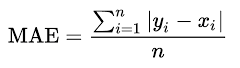   



MAE aşağıdaki sıra ile hesaplanır:
* Her bir veri noktasının residualı hesaplanır.
* Mutlak değer alınır (değer negatif olursa kurtulmak için)
* Residualların ortalaması hesaplanır

MAE sıfır ise bu modelin yaptığı tahminin mükemmel olduğunu gösterir.


**Regresyon Metrikleri: Mean Squared Error(MSE)**
* Ortalama kare hatası, MAE'ye çok benzer. Ancak mutlak değer kullanmak yerine, model tahminleri ile eğitim veri seti(gerçek değerler) arasındaki farkın karelerini hesaplar. 

* MSE değerleri, residualların karesi alındığından dolayı MAE değerlerine kıyasla çok daha büyüktür. 

* Aykırı veri olması durumunda MSE, MAE'ye kıyasla çok daha büyük hale gelecektir.

* MSE'de hata 2.dereceden bir şekilde artarken, MAE'de hata orantısal bir şekilde artar.

* Ortalama kare hatasının hesaplanması --> 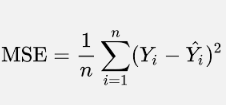

 MSE aşağıdaki sıra ile hesaplanır:
* Her veri noktası için residual hesaplanır
* Residualların karesi hesaplanır
* 2.adımda elde edilen sonucun ortalaması hesaplanır


Regresyon Metrikleri: Root Mean Square Error (RMSE)
* Hatanın ortalama karekökü, residualların standart sapmasını temsil eder.
* RMSE, residualların ne derece büyük dağıldığına ilişkin bir tahmin sağlar. 

RMSE hesaplanması --> 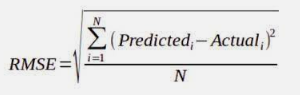



RMSE aşağıdaki sıra ile hesaplanır:
1-Her veri noktası için residual değerlerini hesaplayın
2-Residualların karesini hesaplayın
3-Karesi alınmış residualların ortalamasını hesaplayın
4-Sonucun karekökünü alın

**Regression Metrikleri: R^2 Katsayı Belirleme**
* Modelde bağımsız değişkenler(x) tarafından açıklanan y'nin varyans oranını temsil eder. 

* Eğer R^2 = 80 ise bu üniversiteye girişteki artışın %80'inin GRE puanından kaynakladığı anlamına gelir. (Simple linear regression modeli varsayılarak.)

* Olabilecek en iyi skor 1.0'dır. 
* Input özelliklerini göz ardı ederek her zaman y'nin beklenen değerini tahmin eden sabir bir model, 0.0'lık bir R^2 puanı alır.


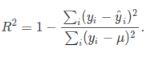

**GÖREV 10:**  En iyi model için KPI'ların gösterilmesi

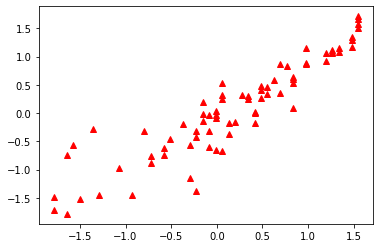

In [39]:
y_predict = LinearRegression_model.predict(X_test)
plt.plot(y_test, y_predict, '^', color='r')

In [40]:
y_predict_orig = scaler_y.inverse_transform(y_predict) 
y_test_orig = scaler_y.inverse_transform(y_test)

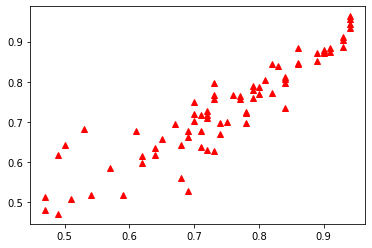

In [41]:
plt.plot(y_test_orig, y_predict_orig, '^', color = 'r')

In [42]:
k = X_test.shape[1]
n= len(X_test)
n

75

In [43]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)), '.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print("RMSE =", RMSE, "\nMSE =", MSE, "\nMAE =", MAE, "\nR2 =", r2, "\nAdjusted R2 =", adj_r2)

RMSE = 0.052 
MSE = 0.0027379298764359547 
MAE = 0.03737781698242074 
R2 = 0.8282105491273554 
Adjusted R2 = 0.8102623975436463
